# Buoyancy
In this notebook we explore how a large disc in a 'fluid' of smaller discs behaves under gravity. We see the large disc floats or sinks depending on its density relative to that of the fluid.

In [1]:
import multiprocessing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colormaps, colors

from buoyancy_worker import test_buoyancy

In [2]:
# Plot the initial state
def create_state_plot(cur_pos, R, bottom_left, top_right):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.gca()
    
    xlim = [bottom_left[0], top_right[0]]
    ylim = [bottom_left[1], top_right[1]]
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width_in_points = bbox.width * 72
    
    s = 4 * ( width_in_points * R/(xlim[1] - xlim[0])) ** 2
    plt.scatter(cur_pos[:, 0], cur_pos[:, 1], s=s, alpha=0.5)
    
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    #return ax

## Single disc
Let's first look at the path of a single disc to understand how simulations are setup.

In [3]:
sim_prop, t, pos = test_buoyancy(0.1)

First let's look at the initial and final positions of all discs

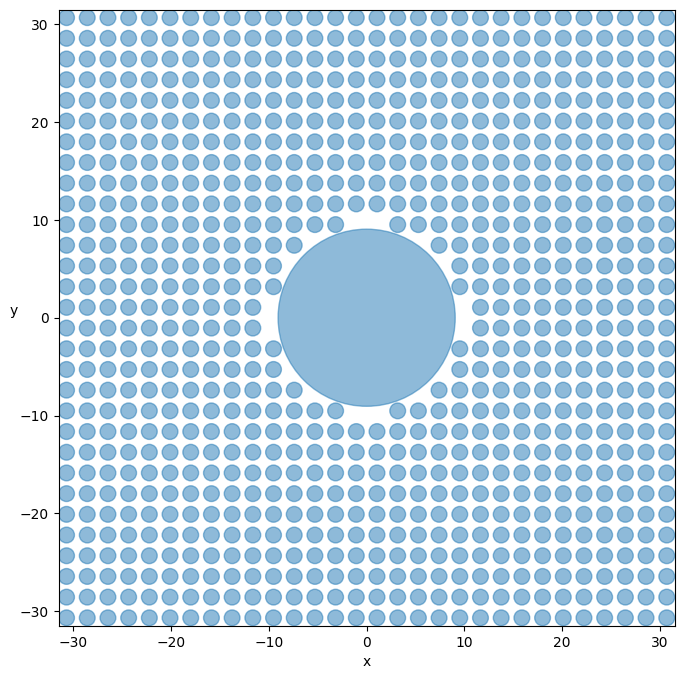

In [4]:
create_state_plot(sim_prop.initial_state['r'], sim_prop.initial_state['R'], sim_prop.bottom_left, sim_prop.top_right)

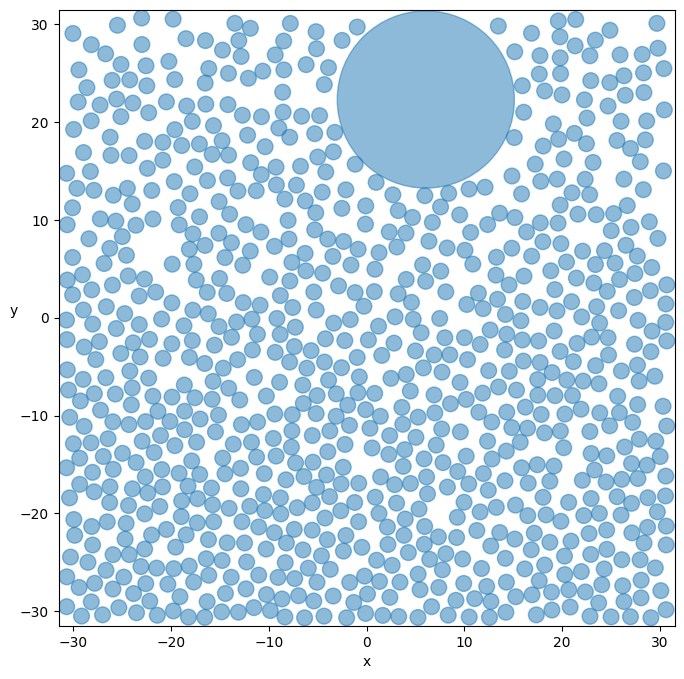

In [5]:
cur_state = sim_prop.get_corrected_current_state()
create_state_plot(cur_state['r'], cur_state['R'], sim_prop.bottom_left, sim_prop.top_right)

Now let's look at the path of the large disc

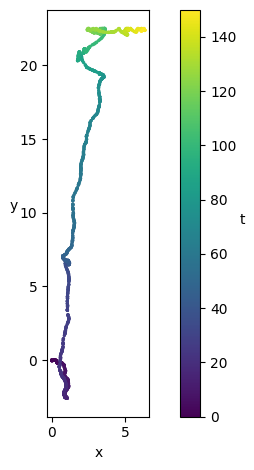

In [6]:
fig, ax = plt.subplots()

cmap = colormaps['viridis']
norm = colors.Normalize(t[0], t[-1])

ax.scatter(pos[:, 0], pos[:, 1], s=2.0, c=cmap(norm(t)))

cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax)
cbar.ax.set_ylabel("t", rotation=0)

ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.tight_layout()
plt.show()

## Effect of density of the large disc under gravity
We now look at how the behaviour of the large disc depends on its density. This might take a few minutes to run

In [7]:
rho = np.linspace(0.05, 0.5, 32)

with multiprocessing.Pool() as pool:
    large_disc_props = pool.map(test_buoyancy, rho)

In [8]:
# Estimate the density of the 'fluid'
sim_prop = large_disc_props[0][0]
big_disc_R = sim_prop.initial_state['R'][0]
fluid_area = np.product(sim_prop.top_right - sim_prop.bottom_left) - np.pi*big_disc_R**2
fluid_mass = np.sum(sim_prop.initial_state['m'][1:])

rho_fluid = fluid_mass/fluid_area
print(f"Estimated fluid density is: {rho_fluid}")

Estimated fluid density is: 0.22398520865935972


Now let's look at the paths each disc followed and their vertical position over time

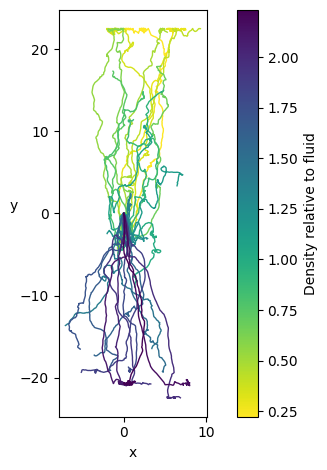

In [9]:
fig, ax = plt.subplots()

cmap = colormaps['viridis_r']
norm = colors.Normalize(rho[0]/rho_fluid, rho[-1]/rho_fluid)

for density, disc_props in zip(rho, large_disc_props):
    _, t, pos = disc_props
    ax.plot(pos[:, 0], pos[:, 1], c=cmap(norm(density/rho_fluid)), linewidth=1.0)

fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, label="Density relative to fluid")
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.tight_layout()
plt.show()

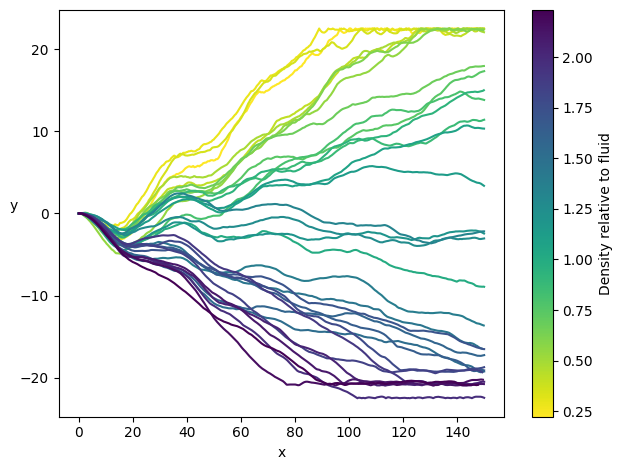

In [10]:
fig, ax = plt.subplots()

cmap = colormaps['viridis_r']
norm = colors.Normalize(rho[0]/rho_fluid, rho[-1]/rho_fluid)

for density, disc_props in zip(rho, large_disc_props):
    _, t, pos = disc_props
    ax.plot(t, pos[:, 1], c=cmap(norm(density/rho_fluid)))

fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, label="Density relative to fluid")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.tight_layout()
plt.show()